<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Joint Project SQL and ML Assignment | Classification Model Development and Unsupervised Learning</h2>
<h3>DAT-5303 | Machine Learning</h3>
Umar Farooq, Jinina Rei Garcia, Naila Jan, Karley Webster <br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<h2>Purpose of the assignment</h2><br>


This assignment looks at the company Flora to begin understanding is customer segment and marketing target strategy. The company completed an outreach campaign by collecting data on customers if they were personal purchasers or wholesalers. As a team of consultants, we are looking at gaining an understanding of the customer segments by predicting wholesalers or purchasers, based on the customer's purchases and persona. The team is looking to support the marketing outreach in its targeting email campaigns and supporting the sales team in understanding the persona of specific purchasers. 

<br><br>
<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Initial Exploration of the data collected from Flora

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**The excel uploaded was imported from SQL with an initial joining of tables and cleaning of the data already having taken place.  <br><br>

Importing the required packages <br><br>

In [1]:
# importing libraries - essentials
import matplotlib.pyplot as plt # data visualization
import pandas            as pd  # data science essentials
import numpy             as np  # mathematical essentials
import seaborn           as sns # enhanced data viz

# importing libraries - machine learning
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest

# packages for unsupervised learning
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

## Importing the Data

Loading the Flora dataset which will be used for analysis.

In [2]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = "./H_Retail_final_query_team10.csv"

#reading the csv file
flora = pd.read_csv(filepath_or_buffer = file)

#printing the first ten rows
flora.head(n = 10)

,customer_id,sex_at_birth,age,occupation1,employment_type1,education,completed_years_of_education,marital_status,relationship_in_household,race,original_country,invoice_count,avg_invoice_line,total_qty_products,max_total_qty_per_product,avg_total_qty_per_product,total_price,type_of_client
0,1112631270,M,44,Exec-managerial,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,Asian-Pac-Islander,PH,2,1.0000,0,3,0.0,5.10,NaN
1,975188263,M,30,Handlers-cleaners,Private,HS-grad,9,Never-married,Other-relative,White,US,12,2.6667,0,8,0.0,0.14,Personal
2,990976233,M,49,Machine-op-inspct,Private,7th-8th,4,Married-civ-spouse,Husband,White,US,30,3.8333,0,8,0.0,91.04,NaN
3,786506419,F,40,Other-service,Private,HS-grad,9,Widowed,Unmarried,White,US,2,1.0000,0,1,0.0,12.33,NaN
4,281959662,F,42,Exec-managerial,Private,Bachelors,13,Divorced,Unmarried,White,US,4,1.5000,0,1,0.0,0.00,Personal
5,697862487,M,49,Sales,Private,Bachelors,13,Married-civ-spouse,Husband,White,US,21,9.1905,0,6,0.0,19.60,NaN
6,4167770845,M,37,Prof-specialty,Private,HS-grad,9,Married-civ-spouse,Husband,White,US,10,2.4000,0,3114,0.0,0.00,NaN
7,2590808881,F,59,Adm-clerical,Private,Some-college,10,Married-civ-spouse,Wife,White,CU,2,1.0000,0,1,0.0,0.00,NaN
8,2488403563,M,33,Adm-clerical,Private,Bachelors,13,Married-civ-spouse,Husband,White,IR,2,1.0000,0,1,0.0,14.05,Personal
9,2428772477,F,25,Tech-support,Private,Assoc-voc,11,Never-married,Unmarried,Black,US,1,1.0000,1,1,1.0,1.25,Personal


## Checking out the Data

Beginning to understand some of the basics of the dataset and exploring the concepts in the data for further description.<br><br>

The team identified a small segment which had been gathered by marketing on wholesalers or personal purchasers. We see that in the dataset, only around 20% was determined to be wholesalers or personal purchasers from marketing. Therefore, the team's predictions were less stable and unpredictable because of not having a large enough data sample. The team suggests building a larger dataset based on feedback from the customers in order to enhance the model to make iterations and further understand the customer segment. <br><br>

In [3]:
#printing the shape of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {flora.shape[0]}
Features:     {flora.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1000
Features:     18



In [1]:
#basic info on the Flora Dataset
#flora.info(verbose= True)

In [5]:
#checking descriptive statistics
flora.describe()

,customer_id,age,completed_years_of_education,invoice_count,avg_invoice_line,total_qty_products,max_total_qty_per_product,avg_total_qty_per_product,total_price
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.173087e+09,37.606000,9.96800,10.967000,4.933476,24.821000,10.461000,2.840343,139.866320
std,1.266957e+09,13.398817,2.46598,11.042547,3.454070,15.360628,99.852135,2.339567,1220.312267
min,1.032711e+07,17.000000,2.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.041482e+09,27.000000,9.00000,4.000000,2.285700,12.000000,4.000000,1.750000,35.655000
50%,2.199034e+09,36.000000,10.00000,9.000000,4.380650,25.000000,6.000000,2.500000,81.650000
75%,3.316945e+09,46.000000,12.00000,14.000000,6.571400,38.000000,8.000000,3.375000,127.862500
max,4.293919e+09,86.000000,16.00000,193.000000,27.129500,51.000000,3114.000000,48.000000,38290.800000


# Review of Missing Values and Imputation 

<br><br>
The team determined that the missing values was a result of not having predicted the wholesalers and personal purchasers. Therefore, this section of the dataset will be used for later analysis. <br><br>

In [6]:
##identifying the missing values in the datatset 
flora.isnull().sum(axis = 0)

customer_id                       0
sex_at_birth                      0
age                               0
occupation1                       0
employment_type1                  0
education                         0
completed_years_of_education      0
marital_status                    0
relationship_in_household         0
race                              0
original_country                  0
invoice_count                     0
avg_invoice_line                  0
total_qty_products                0
max_total_qty_per_product         0
avg_total_qty_per_product         0
total_price                       0
type_of_client                  845
dtype: int64

# Adding Features of potential importance

<br><br>
The team modified the features to be in line with the requirements from Flora and to meet more expectations. These included things such as being a US purchaser or being an international purchaser, limiting the types of jobs, etc. The marketing team had worked to collect additional information on customer segments, but without a consistent labeling structure, it made it difficult to segment. Therefore, the consulting team determined, based on Flora's current segmentation, key clusters which would aid in the understanding and analysis of Flora's customer persona. <br><br>


In [7]:
#subsetting the data and assigning 0 and 1 to type of client and labeling the 0's in other columns
flora.type_of_client[flora.type_of_client == 'Personal'] = 0
flora.type_of_client[flora.type_of_client == 'Wholesaler'] = 1
flora.occupation1[flora.occupation1 == '0'] = 'Unknown_occupation'
flora.employment_type1[flora.employment_type1 == '0'] = 'Unknown_employment'
flora.original_country[flora.original_country == '0'] = 'Unknown_country'

C:\Users\JININA~1\AppData\Local\Temp/ipykernel_10636/2192621923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flora.type_of_client[flora.type_of_client == 'Personal'] = 0
C:\Users\JININA~1\AppData\Local\Temp/ipykernel_10636/2192621923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flora.type_of_client[flora.type_of_client == 'Wholesaler'] = 1
C:\Users\JININA~1\AppData\Local\Temp/ipykernel_10636/2192621923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [8]:
# Current Ocupation - Created Other Services and Private Services groups
flora['occupation1'] = flora['occupation1'].replace(['Protective-serv','Priv-house-serv'], 'Private Services')
flora['occupation1'] = flora['occupation1'].replace(['Machine-op-inspct', 'Other-service', 'Exec-managerial',
       'Prof-specialty', 'Adm-clerical', 'Sales', 'Handlers-cleaners','Craft-repair', 'Unknown_occupation',
       'Farming-fishing', 'Tech-support', 'Transport-moving'], 'Other Services')

# Employment Type - Created Government Employment, Self Employment, No Employment and Private Employment groups
flora['employment_type1'] = flora['employment_type1'].replace([ 'Local-gov', 'State-gov', 'Federal-gov'], 
                                                              'Government Employment')
flora['employment_type1'] = flora['employment_type1'].replace([  'Self-emp-not-inc', 
                                                                 'Self-emp-inc'], 'Self Employment')
flora['employment_type1'] = flora['employment_type1'].replace(['Never-worked','Unknown_employment' ], 'No Employment')
flora['employment_type1'] = flora['employment_type1'].replace(['Private'], 'Private Employment')

# Education - Created Undergraduate and Graduate Education groups
flora['education'] = flora['education'].replace(['7th-8th','9th','5th-6th','1st-4th','Preschool','10th','11th','12th',
                                                 'Some-college'], 'Undergraduate')
flora['education'] = flora['education'].replace(['Prof-school','HS-grad','Assoc-voc','Assoc-acdm','Doctorate','Bachelors',
                                                 'Masters'], 'Graduate Education')

#Reltationship in household - Created Living with family and Not in Family groups
flora['relationship_in_household'] = flora['relationship_in_household'].replace(['Husband', 'Wife','Own-child',
                                                                                 'Other-relative'], 'Living_with_Family')
flora['relationship_in_household'] = flora['relationship_in_household'].replace(['Not-in-family', 'Unmarried'], 
                                                                                'Not_in_Family')


# Marital Status - Created Other Marital Status and Married groups
flora['marital_status'] = flora['marital_status'].replace([ 'Married-spouse-absent','Widowed', 'Divorced', 'Separated',
                                                           'Never-married'], 'Other Marital Status')
flora['marital_status'] = flora['marital_status'].replace(['Married-civ-spouse', 'Married','Married-AF-spouse'],'Married')

# Race - Created Other Race
flora['race'] = flora['race'].replace(['Amer-Indian-Eskimo','Other', 'Asian-Pac-Islander'], 'Other Race')

# Country - USA vs Rest of the World
flora['original_country'] = flora['original_country'].replace(['CU', 'PH', 'IR', 'PL', 'HT', 'TH', 'CA', 'PT', 'DE', 'MX',
       'CN', 'PE', 'Unknown_country', 'KR', 'GB-EN', 'SV', 'NI', 'GT',
       'JM', 'HN', 'VN', 'TW', 'EC', 'IE', 'PR', 'IN', 'DO'], 'Rest of the World')

In [9]:
#dropping the na for clean_flora
clean_flora = flora.dropna()

clean_flora.isnull().any().any()

False

In [10]:
#checking the information of the dataframe
clean_flora.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 994
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   155 non-null    int64  
 1   sex_at_birth                  155 non-null    object 
 2   age                           155 non-null    int64  
 3   occupation1                   155 non-null    object 
 4   employment_type1              155 non-null    object 
 5   education                     155 non-null    object 
 6   completed_years_of_education  155 non-null    int64  
 7   marital_status                155 non-null    object 
 8   relationship_in_household     155 non-null    object 
 9   race                          155 non-null    object 
 10  original_country              155 non-null    object 
 11  invoice_count                 155 non-null    int64  
 12  avg_invoice_line              155 non-null    float64
 13  total

In [11]:
#converting the type_of_client to integer
clean_flora["type_of_client"] = clean_flora["type_of_client"].astype(int)

C:\Users\JININA~1\AppData\Local\Temp/ipykernel_10636/3753657320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_flora["type_of_client"] = clean_flora["type_of_client"].astype(int)


In [12]:
# one hot encoding categorical variables
one_hot_occupation           = pd.get_dummies(clean_flora['occupation1'])
one_hot_employment           = pd.get_dummies(clean_flora['employment_type1'])
one_hot_education            = pd.get_dummies(clean_flora['education'])
one_hot_marital_status       = pd.get_dummies(clean_flora['marital_status'])
one_hot_relationship         = pd.get_dummies(clean_flora['relationship_in_household'])
one_hot_race                 = pd.get_dummies(clean_flora['race'])
one_hot_country              = pd.get_dummies(clean_flora['original_country'])
one_hot_sex_at_birth         = pd.get_dummies(clean_flora['sex_at_birth'])

# dropping categorical variables after they've been encoded
clean_flora = clean_flora.drop('occupation1', axis = 1)
clean_flora = clean_flora.drop('employment_type1', axis = 1)
clean_flora = clean_flora.drop('education', axis = 1)
clean_flora = clean_flora.drop('marital_status', axis = 1)
clean_flora = clean_flora.drop('relationship_in_household', axis = 1)
clean_flora = clean_flora.drop('race', axis = 1)
clean_flora = clean_flora.drop('original_country', axis = 1)
clean_flora = clean_flora.drop('sex_at_birth', axis = 1)
clean_flora = clean_flora.drop('customer_id', axis = 1)

# joining codings together
clean_flora = clean_flora.join([one_hot_occupation, one_hot_employment, one_hot_education, one_hot_marital_status, one_hot_relationship, one_hot_race, one_hot_country])

# Correlation Matrix 

<br><br><br>
The correlation matrix helps to highlight some of the key features of importance for Flora. We can see that there is a strong correlation between the average number of invoice lines and the count of invoices. Additionally, the total quantity of products purchased also had a strong correlation. Since Flora, has collected this information from customers, we are then able to use it for marketing products and purchases. Customers are either purchasing in higher quantities and purchasing more frequently, or are purchasing less frequently in lower quantities. <br><br>

When looking at the line ‘type of client’, the highest correlation is the total quantity of products. Meaning, that customers who are purchasing more quantity of products probably belong to a certain type of client, most likely the wholesalers. <br><br>

The lowest correlation for the type of client is the maximum total quantity of each individual product. As this is a low correlation, we can assume that both types of clients are purchasing varying levels of maximum total quantities. For example, an individual doing a DIY project at home one time might require a lot of one product, but once they are finished the project will not need to return for the same product again. This could help explain the lower correlation. This type of understanding could also help the marketing team as they make decisions about targeting customers. <br><br>

At Flora, the marketing team could use this insight for deciding the types of campaigns to run and promotional deals to offer. These campaigns could be targeted at both wholesalers and individuals doing a DIY project as the maximum total quantities has little correlation with the type of client. For example, since we know that certain customers are purchasing more frequently and in larger quantities, then potentially having deals such as the frequency at which they purchase or receive a discount for purchasing in bulk might incentivize these clients to continue using Flora. <br><br>

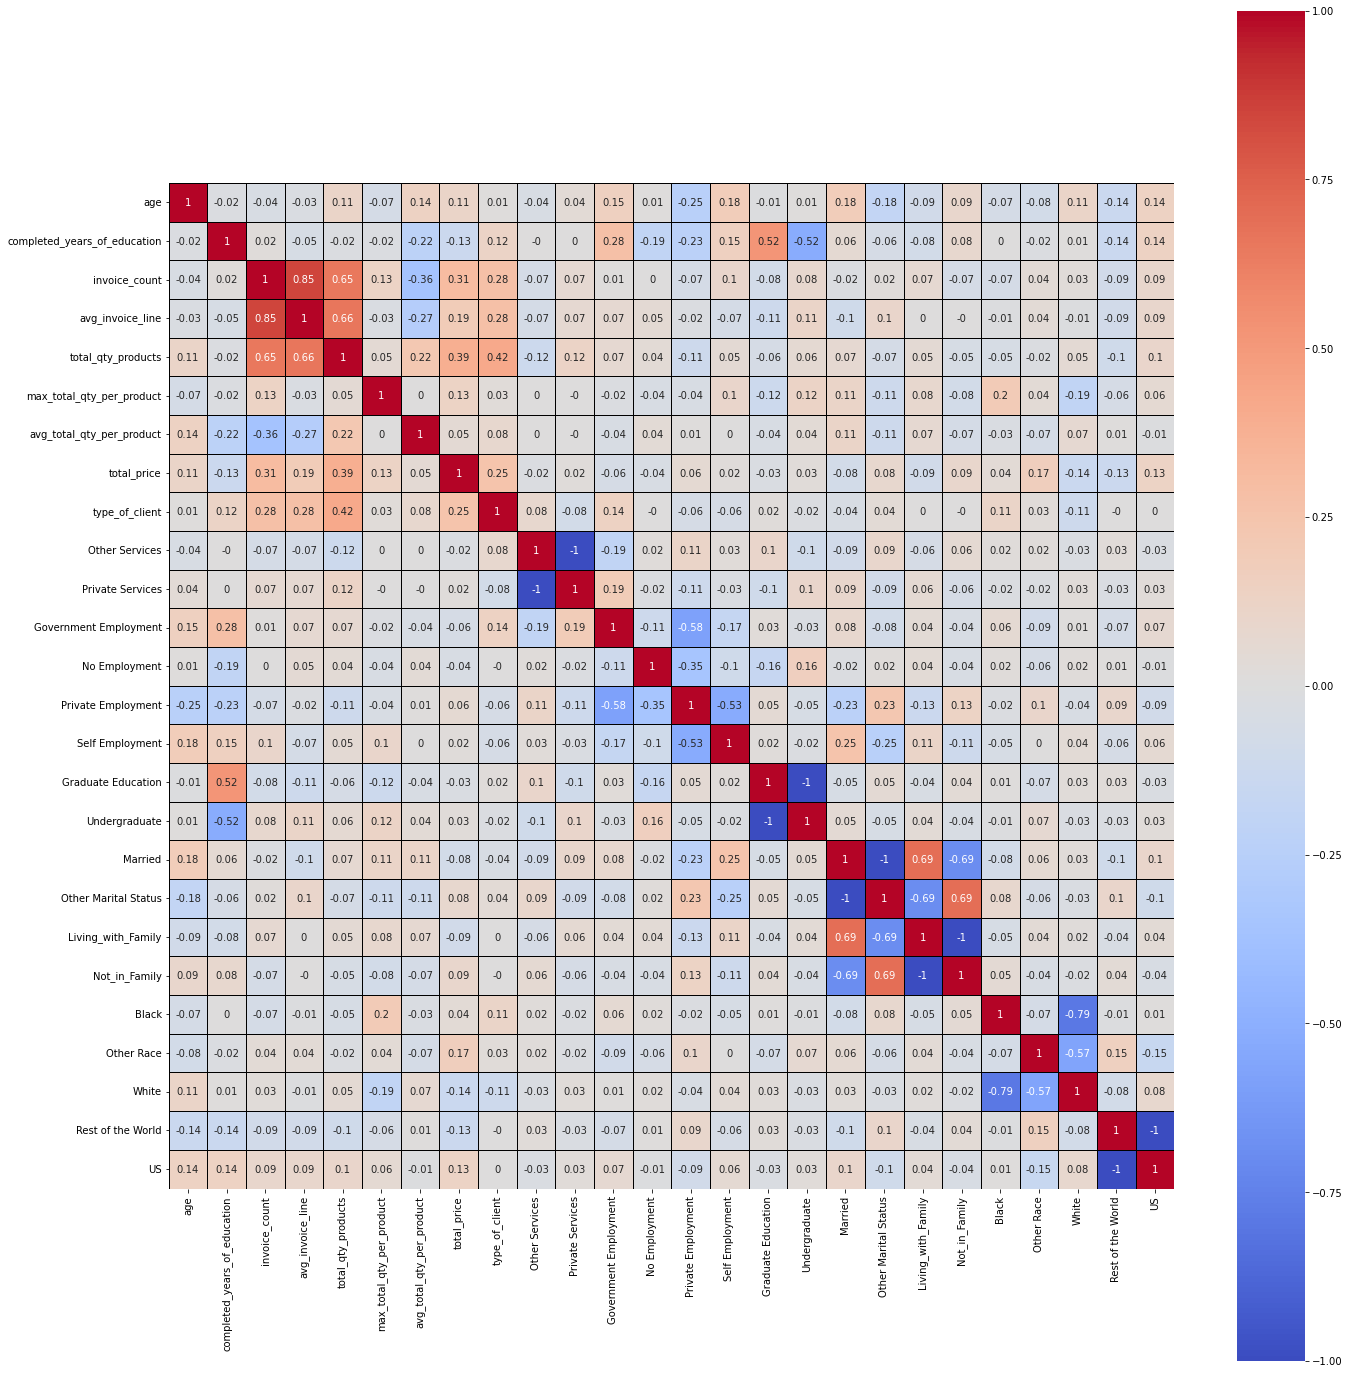

In [13]:
# instantiating a correlation matrix
df_corr = clean_flora.corr().round(2)

# setting figure size
fig, ax = plt.subplots(figsize=(20,20))

# visualizing the correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.tight_layout()
plt.show()


In [14]:
#getting the count of personal and wholesale customers
count_personal = len(clean_flora[clean_flora['type_of_client']== 0])
count_wholesaler = len(clean_flora[clean_flora['type_of_client'] == 1])

#computing the percentage of personal customers
per_personal = count_personal/(count_personal+ count_wholesaler)
print("Percentage of personal customers is", round(per_personal*100),end = '%\n' )

#computing the percentage of wholesale customers
per_wholesaler = count_wholesaler/(count_wholesaler+count_personal)
print("Percentage of wholesaler customer is", round(per_wholesaler*100),end = '%')

Percentage of personal customers is 50%
Percentage of wholesaler customer is 50%

In [15]:
#creating the dataframe containing only the null values in type of client
unclean_flora = flora[flora["type_of_client"].isnull()]

# one hot encoding categorical variables
one_hot_occupation           = pd.get_dummies(unclean_flora['occupation1'])
one_hot_employment           = pd.get_dummies(unclean_flora['employment_type1'])
one_hot_education            = pd.get_dummies(unclean_flora['education'])
one_hot_marital_status       = pd.get_dummies(unclean_flora['marital_status'])
one_hot_relationship         = pd.get_dummies(unclean_flora['relationship_in_household'])
one_hot_race                 = pd.get_dummies(unclean_flora['race'])
one_hot_country              = pd.get_dummies(unclean_flora['original_country'])
one_hot_sex_at_birth         = pd.get_dummies(unclean_flora['sex_at_birth'])

# dropping categorical variables after they've been encoded
unclean_flora = unclean_flora.drop('occupation1', axis = 1)
unclean_flora = unclean_flora.drop('employment_type1', axis = 1)
unclean_flora = unclean_flora.drop('education', axis = 1)
unclean_flora = unclean_flora.drop('marital_status', axis = 1)
unclean_flora = unclean_flora.drop('relationship_in_household', axis = 1)
unclean_flora = unclean_flora.drop('race', axis = 1)
unclean_flora = unclean_flora.drop('original_country', axis = 1)
unclean_flora = unclean_flora.drop('sex_at_birth', axis = 1)
unclean_flora = unclean_flora.drop('customer_id', axis = 1)

# joining codings together
unclean_flora = unclean_flora.join([one_hot_occupation, one_hot_employment, one_hot_education, one_hot_marital_status, one_hot_relationship, one_hot_race, one_hot_country])

unclean_flora.head(n=10)

,age,completed_years_of_education,invoice_count,avg_invoice_line,total_qty_products,max_total_qty_per_product,avg_total_qty_per_product,total_price,type_of_client,Other Services,Private Services,Government Employment,No Employment,Private Employment,Self Employment,Graduate Education,Undergraduate,Married,Other Marital Status,Living_with_Family,Not_in_Family,Black,Other Race,White,Rest of the World,US
0,44,13,2,1.0000,0,3,0.0,5.10,NaN,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0
2,49,4,30,3.8333,0,8,0.0,91.04,NaN,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1
3,40,9,2,1.0000,0,1,0.0,12.33,NaN,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1
5,49,13,21,9.1905,0,6,0.0,19.60,NaN,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1
6,37,9,10,2.4000,0,3114,0.0,0.00,NaN,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1
7,59,10,2,1.0000,0,1,0.0,0.00,NaN,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0
11,23,10,1,1.0000,1,1,1.0,2.95,NaN,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1
12,32,9,1,1.0000,1,1,1.0,2.55,NaN,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1
13,67,9,1,1.0000,1,1,1.0,8.50,NaN,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1
14,24,9,1,1.0000,1,1,1.0,2033.10,NaN,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1


# Building a Logistic Regression Model

### Observations: <br><br>

The first model the team created was the logistic regression. We found that this was not supportive of Flora's current efforts and therefore did not use this model as part of the final decision. This model had a high number of false positives, meaning clients that assumed would be wholesalers, but were not actually wholesalers. Therefore, this model was not as accurate in predicting wholesalers. <br>

In [16]:
# Preparing the target variable
clean_flora_data = clean_flora.drop(['type_of_client'], axis=1)
clean_flora_target = clean_flora.loc[ : , 'type_of_client']

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            clean_flora_data,     # x-variables
            clean_flora_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [17]:
# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_FULL.shape}
y-side: {y_train_FULL.shape[0]}


Testing Data
------------
X-side: {x_test_FULL.shape}
y-side: {y_test_FULL.shape[0]}
""")


Training Data
-------------
X-side: (116, 25)
y-side: 116


Testing Data
------------
X-side: (39, 25)
y-side: 39



In [18]:
# INSTANTIATING a logistic model object
logreg = LogisticRegression()

# FITTING to the training data
logreg.fit(x_train_FULL, y_train_FULL)

# PREDICTING on new data
logreg_pred = logreg.predict(x_test_FULL)

# SCORING the results
logreg_test_score =logreg.score(x_test_FULL, y_test_FULL).round(decimals=4)
logreg_test_score 

logreg_train_score=logreg.score(x_train_FULL, y_train_FULL).round(decimals=4)
logreg_train_score

print('Logistic Regression Training Score:', logreg.score(x_train_FULL, y_train_FULL).round(4))
print('Logistic Regression Testing Score :', logreg.score(x_test_FULL, y_test_FULL).round(4))


# displaying and saving the gap between training and testing
print('Logistic Regression Train-Test Gap:', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

print('AUC score   :', roc_auc_score(y_true  = y_test_FULL,
                                 y_score = logreg_pred).round(decimals = 4))

# area under the roc curve (auc)
roc_auc_score(y_true  = y_test_FULL,
                    y_score = logreg_pred).round(decimals = 4)

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test_FULL,
                                 y_score = logreg_pred).round(decimals = 4)

Logistic Regression Training Score: 0.75
Logistic Regression Testing Score : 0.6154
Logistic Regression Train-Test Gap: 0.1346
AUC score   : 0.6257


C:\Users\Jinina Rei Garcia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test_FULL, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 12
False Positives: 10
False Negatives: 5
True Positives : 12



# Classification Modeling with KNN

## KNN: <br><br>
This model did a better job at predicting those which were wholesalers or personal users, but still had a high number of customers who it thought they were wholesalers, but actually not. Therefore, the consulting team will work to tune these models to ensure that Flora is able to more accurately predict these.<br><br>

In [20]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

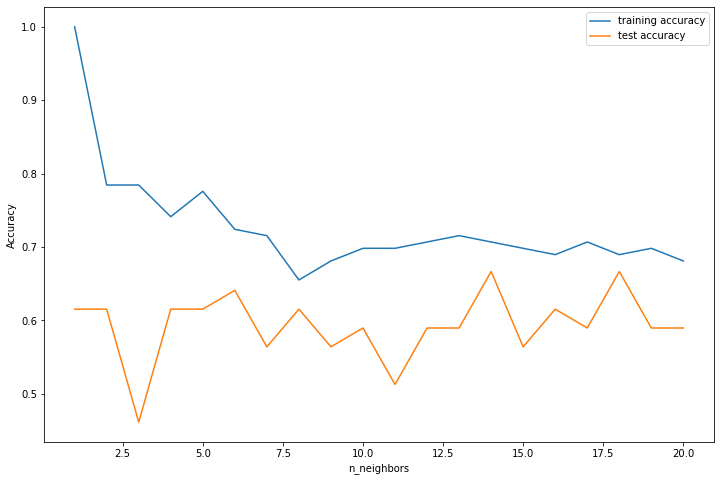

The optimal number of neighbors is: 14


In [21]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = clean_flora_data,
                                  y_data        = clean_flora_target,
                                  response_type = 'class')

In [22]:
# INSTANTIATING a KNN model object
knn_class = KNeighborsClassifier(algorithm = 'auto',
                              n_neighbors =14)


# FITTING to the training data
knn_fit = knn_class.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
knn_class_pred = knn_fit.predict(x_test_FULL)


# SCORING the results
print('KNN Training Score:', knn_class.score(x_train_FULL, y_train_FULL).round(4))
print('KNN Testing Score :',  knn_class.score(x_test_FULL, y_test_FULL).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_FULL,
                                          y_score = knn_class_pred).round(4))


# saving scoring data for future use
knn_class_score_train = knn_class.score(x_train_FULL, y_train_FULL).round(4)
knn_class_score_test  = knn_class.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_class_score_train - knn_class_score_test).round(4))
knn_class_test_gap = abs(knn_class_score_train - knn_class_score_test).round(4)

# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test_FULL,
                                          y_score = knn_class_pred).round(4)

KNN Training Score: 0.6983
KNN Testing Score : 0.6923
AUC Score        : 0.7206
KNN Train-Test Gap: 0.006


In [23]:
# unpacking the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test_FULL, y_pred = knn_class_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")


True Negatives : 11
False Positives: 11
False Negatives: 1
True Positives : 16



In [24]:
# creating a hyperparameter grid
grid_params = { 'n_neighbors' : [5,7,9,11,13],
                'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


# INSTANTIATING the model object without hyperparameters
tuned_knn = KNeighborsClassifier()


# RandomizedSearchCV object
tuned_knn_cv = RandomizedSearchCV(estimator             = tuned_knn,
                                   param_distributions   = grid_params,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_knn_cv.fit(clean_flora_data, clean_flora_target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_knn_cv.best_params_)
print("Tuned Training AUC:", tuned_knn_cv.best_score_.round(4))

C:\Users\Jinina Rei Garcia\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 30 is smaller than n_iter=1000. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'minkowski'}
Tuned Training AUC: 0.6071


In [25]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
knn_tuned = KNeighborsClassifier(weights= 'uniform', n_neighbors= 13, metric= 'minkowski')


# FITTING to the FULL DATASET (due to cross-validation)
knn_tuned_fit = knn_tuned.fit(clean_flora_data, clean_flora_target)


# PREDICTING based on the testing set
knn_tuned_pred = knn_tuned.predict(x_test_FULL)


# SCORING the results
print('Training ACCURACY:', knn_tuned.score(x_train_FULL, y_train_FULL).round(4))
print('Testing  ACCURACY:', knn_tuned.score(x_test_FULL, y_test_FULL).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_FULL,
                                          y_score = knn_tuned_pred).round(4))


# saving scoring data for future use
knn_tuned_train_score = knn_tuned.score(x_train_FULL, y_train_FULL).round(4) # accuracy
knn_tuned_test_score  = knn_tuned.score(x_test_FULL, y_test_FULL).round(4)   # accuracy

# PREDICT step is not needed
print('KNN Train-Test Gap   :', abs(knn_tuned_train_score - knn_tuned_test_score).round(4))
knn_tuned_test_gap = abs(knn_tuned_train_score - knn_tuned_test_score).round(4)

# saving the AUC score
knn_tuned_auc_score         = roc_auc_score(y_true  = y_test_FULL,
                                       y_score = knn_tuned_pred).round(4) # auc

Training ACCURACY: 0.7155
Testing  ACCURACY: 0.7179
AUC Score        : 0.7366
KNN Train-Test Gap   : 0.0024


In [26]:
# unpacking the confusion matrix
knn_tuned_tn, \
knn_tuned_fp, \
knn_tuned_fn, \
knn_tuned_tp = confusion_matrix(y_true = y_test_FULL, y_pred = knn_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tuned_tn}
False Positives: {knn_tuned_fp}
False Negatives: {knn_tuned_fn}
True Positives : {knn_tuned_tp}
""")


True Negatives : 13
False Positives: 9
False Negatives: 2
True Positives : 15



In [27]:
# comparing results
print(f"""
Model           AUC Score\t\tTrainAcc\tTestAcc\t\tTrain-Test-Gap\t\tTN, FP, FN, TP
-----           ---------\t\t--------\t-------\t\t--------------\t\t--------------
LogisticRegression  {logreg_auc_score}\t\t{logreg_train_score}\t\t{logreg_test_score}\t\t{logreg_test_gap}\t\t\t{logreg_tn, logreg_fp, logreg_fn, logreg_tp}
KNN                 {knn_auc_score}\t\t{knn_class_score_train}\t\t{knn_class_score_test}\t\t{knn_class_test_gap}\t\t\t{knn_tn,knn_fp,knn_fn,knn_tp}
KNN tuned ***       {knn_tuned_auc_score}\t\t{knn_tuned_train_score}\t\t{knn_tuned_test_score}\t\t{knn_tuned_test_gap}\t\t\t{knn_tuned_tn,knn_tuned_fp,knn_tuned_fn,knn_tuned_tp}

***Final model
""")


Model           AUC Score		TrainAcc	TestAcc		Train-Test-Gap		TN, FP, FN, TP
-----           ---------		--------	-------		--------------		--------------
LogisticRegression  0.6257		0.75		0.6154		0.1346			(12, 10, 5, 12)
KNN                 0.7206		0.6983		0.6923		0.006			(11, 11, 1, 16)
KNN tuned ***       0.7366		0.7155		0.7179		0.0024			(13, 9, 2, 15)

***Final model



# Base Model Confusion Matrix and its Improvement
<br><br>
The basic confusion matrix of the selected model was identifying equally the true negative as the actual customers of the flora and false positive, the predicated customers but it was good in predicting the original values as like the wholesaler and the personal user of the flora, while by tuning the KNN model the confusion matrix values were improved for correct prediction and it predicated most of the customers as wholesalers rather than personal customers. The new model correctly predicted the True Negative as 87% and True Positive as 63% while in the untuned model the True positive values were predicated as 59%, the new tuned model shows a significant improvement of True Positive values.
<br><br>
Due to the improvement of the True positive value the AUC score is also improved from 72% to almost 74% and consequently the accuracy of the test and train score is significantly improved while the gap between the train test score is reduced to 0.002%. Since the overall analysis based on the confusion matrix is showing a significant improvement of the tuned model. This new model is using the demographic variable that is the age of the customers while predicting the type of the customers and it shows that mid age customers are mostly the wholesalers as they buy bulk of products in high volume. <br><br>

For getting the correct prediction, the dummied were added to get better accuracy as more data get inserted the system would have the choice to get better decision. The model is tuned and more featured were added like the age of the customers that were not added previously. And the model classifies them as most of the middle-aged people were the wholesalers while in contrast most of the young aged customers were the personal customers. This way the model is able to get more correct prediction than the previous one.   


# Testing our model on the unlabeled data

### Initial Observations: 


In [28]:
# Preparing the target variable
base_predict = unclean_flora.drop('type_of_client' ,axis=1)


# PREDICTING on new data
knn_pred = knn_tuned_fit.predict(base_predict)

In [29]:
#creating and concatinating the predicted column to the unlabeled data
flora_new = pd.DataFrame(logreg_pred)
flora_new['real_client'] = flora_new[:]
flora_new = flora_new.drop(0, axis = 1)
unclean_flora['real_client'] = flora_new


In [30]:
#displaying the unclean_flora with the predicted value as real_client
unclean_flora.head(n=10)

,age,completed_years_of_education,invoice_count,avg_invoice_line,total_qty_products,max_total_qty_per_product,avg_total_qty_per_product,total_price,type_of_client,Other Services,Private Services,Government Employment,No Employment,Private Employment,Self Employment,Graduate Education,Undergraduate,Married,Other Marital Status,Living_with_Family,Not_in_Family,Black,Other Race,White,Rest of the World,US,real_client
0,44,13,2,1.0000,0,3,0.0,5.10,NaN,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1.0
2,49,4,30,3.8333,0,8,0.0,91.04,NaN,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1.0
3,40,9,2,1.0000,0,1,0.0,12.33,NaN,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0.0
5,49,13,21,9.1905,0,6,0.0,19.60,NaN,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1.0
6,37,9,10,2.4000,0,3114,0.0,0.00,NaN,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1.0
7,59,10,2,1.0000,0,1,0.0,0.00,NaN,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0.0
11,23,10,1,1.0000,1,1,1.0,2.95,NaN,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0.0
12,32,9,1,1.0000,1,1,1.0,2.55,NaN,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0.0
13,67,9,1,1.0000,1,1,1.0,8.50,NaN,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1.0
14,24,9,1,1.0000,1,1,1.0,2033.10,NaN,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1.0


# Implementing UnSupervised Learning

In [31]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [32]:
# dropping demographic and pyschometric information
purchase_behavior = flora.loc[:, ('age','completed_years_of_education','invoice_count',
                                        'total_qty_products', 'avg_total_qty_per_product',
                                        'total_price')]

# applying the unsupervised_scaler function
purchases_scaled = unsupervised_scaler(df = purchase_behavior)


# checking pre- and post-scaling variance
print(np.var(purchase_behavior), '\n\n')
print(np.var(purchases_scaled))

age                             1.793488e+02
completed_years_of_education    6.074976e+00
invoice_count                   1.218159e+02
total_qty_products              2.357130e+02
avg_total_qty_per_product       5.468101e+00
total_price                     1.487673e+06
dtype: float64 


age                             1.0
completed_years_of_education    1.0
invoice_count                   1.0
total_qty_products              1.0
avg_total_qty_per_product       1.0
total_price                     1.0
dtype: float64


# Principal Component Analysis

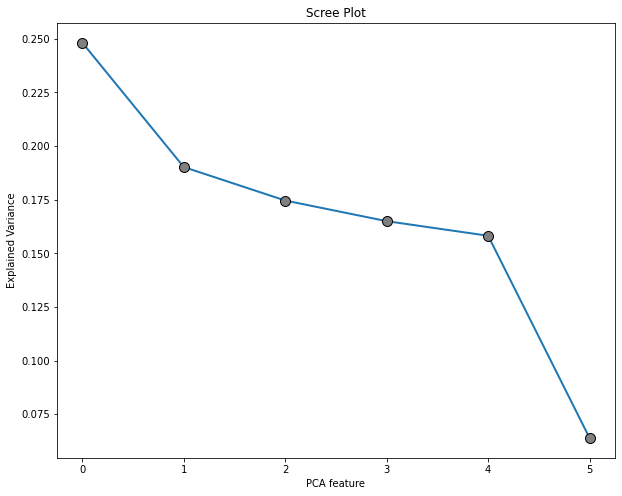

In [33]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca = pca.fit_transform(purchases_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [34]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += component_number
    
    print(f"PC {component_number}: {variance.round(2)}")

PC 0: 0.25
PC 0: 0.19
PC 0: 0.17
PC 0: 0.16
PC 0: 0.16
PC 0: 0.06


# Reduce the number of principal components to a reasonable number based on the scree plot above.

In [35]:
# INSTANTIATING a PCA object with the reasonable number of principal components - 80% explained variance 
pca_4 = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_4 = pca_4.fit_transform(purchases_scaled)

In [36]:
# Optional Step

factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(purchases_scaled.columns)


##################
### 4 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_4 = pd.DataFrame(np.transpose(pca_4.components_))


# naming rows as original features
factor_loadings_4 = factor_loadings_4.set_index(purchases_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


4 Components Factor Loadings
------------------------------
{factor_loadings_4.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                 0     1     2     3     4     5
age                          -0.06  0.09 -0.66  0.36 -0.66  0.02
completed_years_of_education  0.07 -0.14 -0.67  0.13  0.71  0.03
invoice_count                 0.73 -0.18  0.03 -0.01 -0.10  0.65
total_qty_products            0.66  0.40 -0.00  0.08  0.02 -0.62
avg_total_qty_per_product    -0.14  0.87  0.03  0.10  0.18  0.43
total_price                  -0.03 -0.15  0.35  0.92  0.13  0.00


4 Components Factor Loadings
------------------------------
                                 0     1     2     3
age                          -0.06  0.09 -0.66  0.36
completed_years_of_education  0.07 -0.14 -0.67  0.13
invoice_count                 0.73 -0.18  0.03 -0.01
total_qty_products            0.66  0.40 -0.00  0.08
avg_total_qty_per_product    -0.14  0.87  0.03  0.10
total_price                  -0.03 -0.15  0.35  0.92



In [37]:
# naming each principal component
factor_loadings_4.columns = ['Young Household Bulk Buyer', 
                            'Mid-aged Wholesaler',
                            'Occasional Customer',
                            'Mid-ranged Wholesaler'
                             
]  


# checking the result
factor_loadings_4.round(decimals = 2)

,Young Household Bulk Buyer,Mid-aged Wholesaler,Occasional Customer,Mid-ranged Wholesaler
age,-0.06,0.09,-0.66,0.36
completed_years_of_education,0.07,-0.14,-0.67,0.13
invoice_count,0.73,-0.18,0.03,-0.01
total_qty_products,0.66,0.40,-0.00,0.08
avg_total_qty_per_product,-0.14,0.87,0.03,0.10
total_price,-0.03,-0.15,0.35,0.92


In [38]:
# analyzing factor strengths per customer
factor_loadings = pca_4.transform(purchases_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_4.columns


# checking the results
factor_loadings_df.head(n = 25)

,Young Household Bulk Buyer,Mid-aged Wholesaler,Occasional Customer,Mid-ranged Wholesaler
0,-1.431036,-1.666485,-1.234363,-0.027645
1,-0.823917,-1.704232,0.562505,-0.621285
2,0.123937,-1.602060,1.064609,-0.323023
3,-1.529657,-1.469598,0.049745,-0.340398
4,-1.289831,-1.713078,-1.132569,-0.085821
5,-0.203495,-1.950489,-1.423997,0.105155
6,-0.988459,-1.622291,0.214511,-0.434081
7,-1.589192,-1.392612,-1.155226,0.208554
8,-1.379640,-1.743928,-0.693458,-0.313443
9,-1.483660,-1.271335,0.248069,-0.591421


In [39]:
#Sending PCA factor loadings to Excel for further analysis.
factor_loadings_df.to_excel('./PCA Factor Loadings.xlsx',
                            index = False)

# Analyzing Factor Loadings

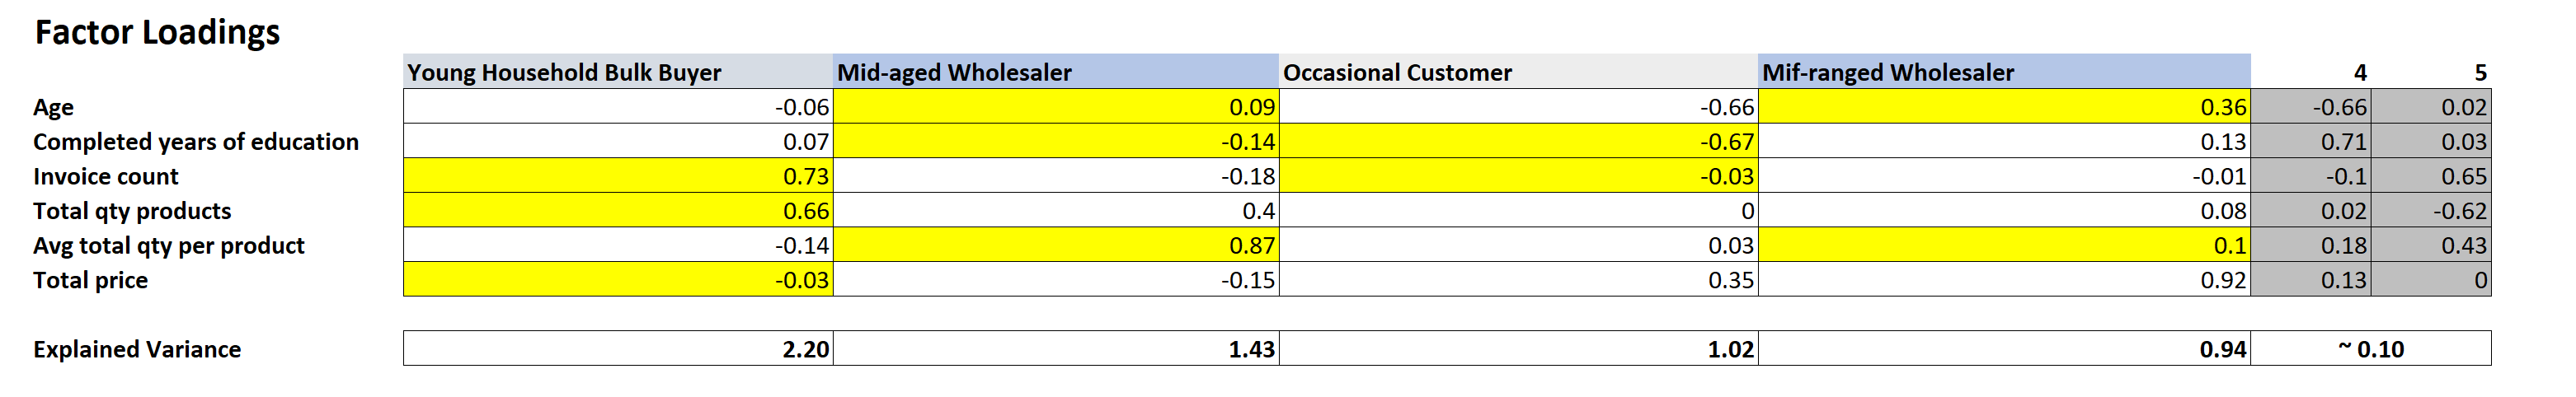

### Findings from the PCA and Factor Loading
In this case study, the loadings are readily interpretable. Column-1, Young package purchasers has a strong positive loading for Total quality products, and negative loadings for completed years of education. As these are analyses of Invoice count and total price, this likely reflects relatively a household customer and could classify as the personal customer of flora. Column-2, Mid-aged Purchaser has strong positive loadings for Avg total quantity per product, which may reflect as a wholesaler. 

The reason for the strong negative loading of completed years of education is unclear, although someone familiar with education and business-related fields could improve their business insights. Column-3, professional Mid-aged Personal users are dominated by positive loadings for completed years of education, while they show a negative loading for invoice count and a weak loading for total quantity of products and also the total price which could classify them as the frequent or new buyers of flora. While the 4th cluster, Young Average Joe illustrates the strong positive loadings for the Avg total quantity per product. In contrast, it shows the negative loading for the Invoice count and the total price. By analyzing this cluster it could be classified as midrange wholesalers.


## Intrepretation of Factor Loadings

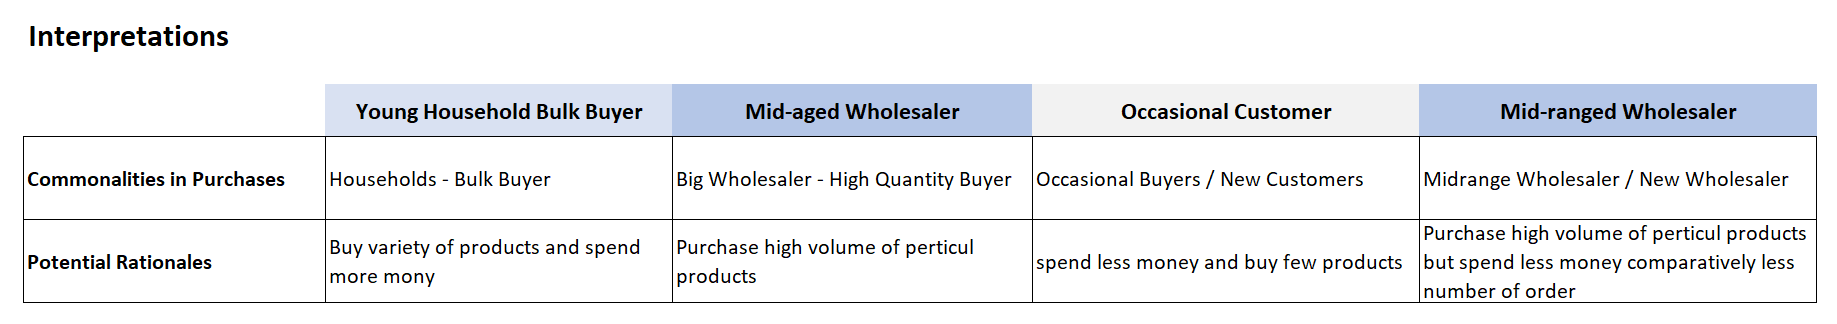

When interpreting the cluster loadings, it is interpreted that the first cluster could classify as the householder customer or the bulk buyers of the Flora as they buy a variety of products and spend more money by analyzing the invoice count and the total price. Another insight of this householder cluster is their total average quantity per product is low which could classify them as householder/ personal customer instead of wholesaler.

The second cluster could be the wholesalers by analyzing their volume products instead of the variety of the products. While cluster three could be the occasional or new buyers as they low invoice count, total quantity of the products and spend less money on buying things but their loading is strong for the completed years of education, which shows that they could be the one-time users that may try different products of Flora.
 
The fourth cluster could also be classified as the Mid-range wholesalers because they order high volumes of products but spend less money by having low invoice count. By comparing it to the big wholesalers of Flora, the high volume of products is common in both also age does not matter for the big and mid-range wholesalers but their invoice count and total price is different which could classify them into different clusters.


In [40]:
# checking variance amongst clusters
np.var(factor_loadings_df)

Young Household Bulk Buyer    1.489082
Mid-aged Wholesaler           1.141242
Occasional Customer           1.047583
Mid-ranged Wholesaler         0.989869
dtype: float64

In [41]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

Young Household Bulk Buyer    1.489082
Mid-aged Wholesaler           1.141242
Occasional Customer           1.047583
Mid-ranged Wholesaler         0.989869
dtype: float64 


Young Household Bulk Buyer    1.0
Mid-aged Wholesaler           1.0
Occasional Customer           1.0
Mid-ranged Wholesaler         1.0
dtype: float64


# Agglomerative Clustering

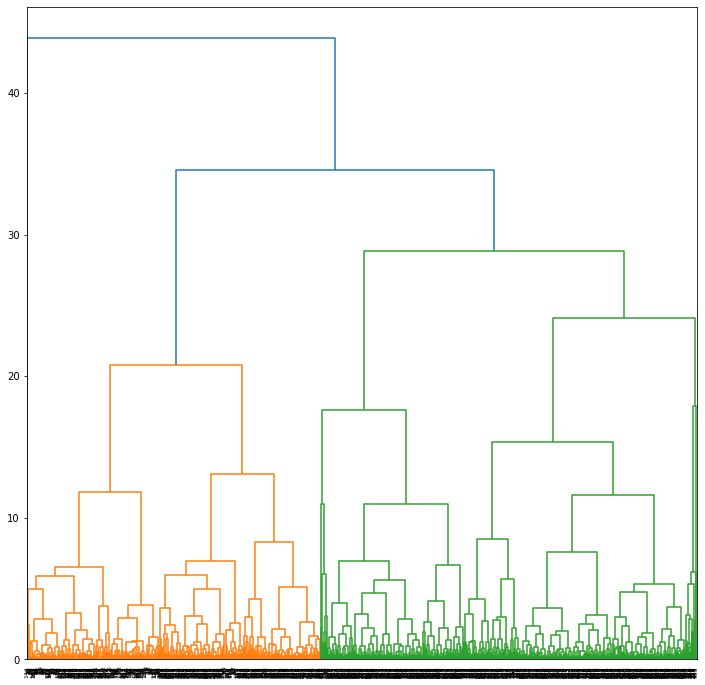

In [42]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [43]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts(normalize = True))

1    0.375
0    0.336
3    0.288
2    0.001
Name: Cluster, dtype: float64


In [44]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns =  ['Young Household Bulk Buyer', 
                            'Mid-aged Wholesaler',
                            'Occasional Customer',
                            'Mid-ranged Wholesaler']  


# checking results (clusters = rows, pc = columns)
centroids_pca_df

,Young Household Bulk Buyer,Mid-aged Wholesaler,Occasional Customer,Mid-ranged Wholesaler
0,0.43,0.36,0.83,-0.27
1,-0.84,-0.49,-0.09,-0.15
2,-1.74,-5.08,11.01,28.50
3,0.59,0.23,-0.89,0.41


In [45]:
flora.isnull().sum(axis =0)

customer_id                       0
sex_at_birth                      0
age                               0
occupation1                       0
employment_type1                  0
education                         0
completed_years_of_education      0
marital_status                    0
relationship_in_household         0
race                              0
original_country                  0
invoice_count                     0
avg_invoice_line                  0
total_qty_products                0
max_total_qty_per_product         0
avg_total_qty_per_product         0
total_price                       0
type_of_client                  845
dtype: int64

In [46]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca, #customer-level data
                          factor_loadings_df], #customer-level data
                          axis = 1)


# renaming the clst_pca_df and rounding off
final_df = pd.concat([flora.loc[ : , ['education', 'employment_type1', 'marital_status','type_of_client']],
                        clst_pca_df.round(decimals = 2)],
                        axis = 1)

# renaming columns
final_df.columns = ['education', 'employment_type', 'marital_status', 'type_of_client', 'cluster',
                    'Young Household Bulk Buyer',  
                            'Mid-aged Wholesaler',
                            'Occasional Customer',
                            'Mid-ranged Wholesaler']


# checking the results
final_df.head(n = 10)

,education,employment_type,marital_status,type_of_client,cluster,Young Household Bulk Buyer,Mid-aged Wholesaler,Occasional Customer,Mid-ranged Wholesaler
0,Graduate Education,Self Employment,Married,NaN,1,-1.43,-1.67,-1.23,-0.03
1,Graduate Education,Private Employment,Other Marital Status,0,1,-0.82,-1.70,0.56,-0.62
2,Undergraduate,Private Employment,Married,NaN,1,0.12,-1.60,1.06,-0.32
3,Graduate Education,Private Employment,Other Marital Status,NaN,1,-1.53,-1.47,0.05,-0.34
4,Graduate Education,Private Employment,Other Marital Status,0,1,-1.29,-1.71,-1.13,-0.09
5,Graduate Education,Private Employment,Married,NaN,1,-0.20,-1.95,-1.42,0.11
6,Graduate Education,Private Employment,Married,NaN,1,-0.99,-1.62,0.21,-0.43
7,Undergraduate,Private Employment,Married,NaN,1,-1.59,-1.39,-1.16,0.21
8,Graduate Education,Private Employment,Married,0,1,-1.38,-1.74,-0.69,-0.31
9,Graduate Education,Private Employment,Other Marital Status,0,1,-1.48,-1.27,0.25,-0.59


In [47]:
#checking the value counts of the new clusters
final_df['cluster'].value_counts()

1    375
0    336
3    288
2      1
Name: cluster, dtype: int64

# Checking the proportions of clusters

In [48]:
# dynamic string with value counts for cluster 1
print(f"""\
 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "cluster"][final_df.loc[ : , "cluster"] == 0]) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 0 , :].to_string(dtype = False, name = False)}

employment_type
-------
{final_df.loc[ : , "employment_type"][ final_df.loc[ : , 'cluster' ] == 0]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  
education
------
{final_df.loc[ : , "education"][ final_df.loc[ : , 'cluster' ] == 0]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
         
marital_status
------
{final_df.loc[ : , "marital_status"][ final_df.loc[ : , 'cluster' ] == 0]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
         


""")

 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
0.34


Centroids
---------
Young Household Bulk Buyer    0.43
Mid-aged Wholesaler           0.36
Occasional Customer           0.83
Mid-ranged Wholesaler        -0.27

employment_type
-------
Government Employment    0.08
No Employment            0.06
Private Employment       0.79
Self Employment          0.07
  
  
education
------
Graduate Education    0.49
Undergraduate         0.51
         
marital_status
------
Married                 0.33
Other Marital Status    0.67
         





In [49]:
# dynamic string with value counts for cluster 2
print(f"""\
 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "cluster"][final_df.loc[ : , "cluster"] == 1]) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 1 , :].to_string(dtype = False, name = False)}

employment_type
-------
{final_df.loc[ : , "employment_type"][ final_df.loc[ : , 'cluster' ] == 1]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  
education
------
{final_df.loc[ : , "education"][ final_df.loc[ : , 'cluster' ] == 1]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
         
marital_status
------
{final_df.loc[ : , "marital_status"][ final_df.loc[ : , 'cluster' ] == 1]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}

""")

 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
0.38


Centroids
---------
Young Household Bulk Buyer   -0.84
Mid-aged Wholesaler          -0.49
Occasional Customer          -0.09
Mid-ranged Wholesaler        -0.15

employment_type
-------
Government Employment    0.14
No Employment            0.06
Private Employment       0.70
Self Employment          0.10
  
  
education
------
Graduate Education    0.67
Undergraduate         0.33
         
marital_status
------
Married                 0.47
Other Marital Status    0.53




In [50]:
# dynamic string with value counts for cluster 3
print(f"""\
 -----------
| Cluster 3 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "cluster"][final_df.loc[ : , "cluster"] == 2]) /
       len(final_df), ndigits = 2)}
       

Centroids
---------
{centroids_pca_df.loc[ 2 , :].to_string(dtype = False, name = False)}

employment_type
-------
{final_df.loc[ : , "employment_type"][ final_df.loc[ : , 'cluster' ] == 2]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  
education
------
{final_df.loc[ : , "education"][ final_df.loc[ : , 'cluster' ] == 2]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
         
marital_status
------
{final_df.loc[ : , "marital_status"][ final_df.loc[ : , 'cluster' ] == 2]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}

""")

 -----------
| Cluster 3 |
 -----------

Proportion of Observations
--------------------------
0.0
       

Centroids
---------
Young Household Bulk Buyer    -1.74
Mid-aged Wholesaler           -5.08
Occasional Customer           11.01
Mid-ranged Wholesaler         28.50

employment_type
-------
Private Employment    1.0
  
  
education
------
Graduate Education    1.0
         
marital_status
------
Married    1.0




In [51]:
# dynamic string with value counts for cluster 4
print(f"""\
 -----------
| Cluster 4 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "cluster"][final_df.loc[ : , "cluster"] == 3]) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 3 , :].to_string(dtype = False, name = False)}

employment_type
-------
{final_df.loc[ : , "employment_type"][ final_df.loc[ : , 'cluster' ] == 3]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  
education
------
{final_df.loc[ : , "education"][ final_df.loc[ : , 'cluster' ] == 3]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
         
marital_status
------
{final_df.loc[ : , "marital_status"][ final_df.loc[ : , 'cluster' ] == 3]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}

""")

 -----------
| Cluster 4 |
 -----------

Proportion of Observations
--------------------------
0.29


Centroids
---------
Young Household Bulk Buyer    0.59
Mid-aged Wholesaler           0.23
Occasional Customer          -0.89
Mid-ranged Wholesaler         0.41

employment_type
-------
Government Employment    0.18
No Employment            0.07
Private Employment       0.57
Self Employment          0.18
  
  
education
------
Graduate Education    0.75
Undergraduate         0.25
         
marital_status
------
Married                 0.59
Other Marital Status    0.41




# Building a New Classification Model

In [52]:
# creating dummies variables 
final_df_dummies = pd.get_dummies(final_df)
 

# Creating dummy variables and adding a new column to verify if it is labeled or not 
final_df_dummies['Label'] = np.where((final_df_dummies['type_of_client_0'] + 
                                      final_df_dummies['type_of_client_1']) == 0, 'F', 'T')


 # checking the data
final_df_dummies.head(n=5)

,cluster,Young Household Bulk Buyer,Mid-aged Wholesaler,Occasional Customer,Mid-ranged Wholesaler,education_Graduate Education,education_Undergraduate,employment_type_Government Employment,employment_type_No Employment,employment_type_Private Employment,employment_type_Self Employment,marital_status_Married,marital_status_Other Marital Status,type_of_client_0,type_of_client_1,Label
0,1,-1.43,-1.67,-1.23,-0.03,1,0,0,0,0,1,1,0,0,0,F
1,1,-0.82,-1.70,0.56,-0.62,1,0,0,0,1,0,0,1,1,0,T
2,1,0.12,-1.60,1.06,-0.32,0,1,0,0,1,0,1,0,0,0,F
3,1,-1.53,-1.47,0.05,-0.34,1,0,0,0,1,0,0,1,0,0,F
4,1,-1.29,-1.71,-1.13,-0.09,1,0,0,0,1,0,0,1,1,0,T


In [53]:
final_df.head(n=5)

,education,employment_type,marital_status,type_of_client,cluster,Young Household Bulk Buyer,Mid-aged Wholesaler,Occasional Customer,Mid-ranged Wholesaler
0,Graduate Education,Self Employment,Married,NaN,1,-1.43,-1.67,-1.23,-0.03
1,Graduate Education,Private Employment,Other Marital Status,0,1,-0.82,-1.70,0.56,-0.62
2,Undergraduate,Private Employment,Married,NaN,1,0.12,-1.60,1.06,-0.32
3,Graduate Education,Private Employment,Other Marital Status,NaN,1,-1.53,-1.47,0.05,-0.34
4,Graduate Education,Private Employment,Other Marital Status,0,1,-1.29,-1.71,-1.13,-0.09


In [54]:
# Not Labeled data
nolabel_final_dummies = final_df_dummies[final_df_dummies['Label'] == 'F']

# Dropping varibles that are not needed
nolabel_final_dummies = nolabel_final_dummies.drop(['type_of_client_0','type_of_client_1',
                                                    'Label', 'cluster'],
                                                     axis = 1)

# checking the final dataset
nolabel_final_dummies.head(n = 5)

,Young Household Bulk Buyer,Mid-aged Wholesaler,Occasional Customer,Mid-ranged Wholesaler,education_Graduate Education,education_Undergraduate,employment_type_Government Employment,employment_type_No Employment,employment_type_Private Employment,employment_type_Self Employment,marital_status_Married,marital_status_Other Marital Status
0,-1.43,-1.67,-1.23,-0.03,1,0,0,0,0,1,1,0
2,0.12,-1.60,1.06,-0.32,0,1,0,0,1,0,1,0
3,-1.53,-1.47,0.05,-0.34,1,0,0,0,1,0,0,1
5,-0.20,-1.95,-1.42,0.11,1,0,0,0,1,0,1,0
6,-0.99,-1.62,0.21,-0.43,1,0,0,0,1,0,1,0


In [55]:
# Labeled data
label_final_dummies = final_df_dummies[final_df_dummies['Label'] == 'T']


# create new classes
label_final_dummies['new_class'] = label_final_dummies['type_of_client_0'].astype(str) + label_final_dummies['cluster'].astype(str)


# drop unneeded columns
label_final_dummies = label_final_dummies.drop(['type_of_client_0', 'type_of_client_1', 'cluster', 'Label'], axis = 1)


# check labeled dataset
label_final_dummies.head(n = 5)


# create data and target for labeled dataset
label_final_data = label_final_dummies.drop('new_class', axis = 1)
label_final_target = label_final_dummies.loc[ : , 'new_class']

C:\Users\JININA~1\AppData\Local\Temp/ipykernel_10636/143549832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_final_dummies['new_class'] = label_final_dummies['type_of_client_0'].astype(str) + label_final_dummies['cluster'].astype(str)


In [56]:
label_final_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 994
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Young Household Bulk Buyer             155 non-null    float64
 1   Mid-aged Wholesaler                    155 non-null    float64
 2   Occasional Customer                    155 non-null    float64
 3   Mid-ranged Wholesaler                  155 non-null    float64
 4   education_Graduate Education           155 non-null    uint8  
 5   education_Undergraduate                155 non-null    uint8  
 6   employment_type_Government Employment  155 non-null    uint8  
 7   employment_type_No Employment          155 non-null    uint8  
 8   employment_type_Private Employment     155 non-null    uint8  
 9   employment_type_Self Employment        155 non-null    uint8  
 10  marital_status_Married                 155 non-null    uint8  
 11  marita

In [57]:
# creating the testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(
    label_final_data,
    label_final_target,
    test_size = 0.25, 
    random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (116, 12)
y-side: (116,)


Testing Data
------------
X-side: (39, 12)
y-side: (39,)



In [58]:
# K-NN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# initiating the model
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model with the training data
knn.fit(X_train, y_train)

# predicting using testing data
y_pred = knn.predict(X_test)

# unpacking the confusion matrix
confusion_matrix(y_true = y_test, y_pred = y_pred)




array([[3, 0, 1, 3, 0, 0],
       [0, 1, 0, 0, 2, 0],
       [0, 0, 7, 0, 0, 0],
       [4, 2, 0, 0, 1, 0],
       [0, 1, 1, 0, 5, 0],
       [0, 1, 7, 0, 0, 0]], dtype=int64)

# New Model Confusion Matrix 

The consulting team had identified four customer segments which Flora should be targeting. These include the Young Household Bulk Buyer, The mid-aged Wholesaler, The occasional customer, and the mid-ranged wholesaler. The new confusion matrix was confused in correctly identifying the young householder bulk buyer as its profile was mostly close to the mid-ranged wholesalers, so it identified most of them as mid-ranged wholesalers which is False positive score. While this new matrix correctly predicted the occasional customers as it was in actual. Because of the unique profile of the occasional customer as financial, their order of the products and also their demographics identified as personal customers correctly in the matrix. In contrast the mid-ranged wholesalers profile identified False Negative as young household bulk buyers.


In other words, because of the shared factors in the profile of young household bulk buyers and the mid-ranged wholesalers the system mixed their prediction. They both are ordering a variety of products and spending money but the volume of the householders was way less than the volume of the mid-ranged wholesalers. The Flora should get more accurate data of the customers order, their receipts and about their profile to correctly identify the type of the customer. Apart from that, we had a lot of data missing regarding the types of the client which was a challenging part for the confusion matrix to make decision based on just few clusters having lower data than expected.

If we get some more data for the type of customer variable and about the profile of the customers, we could get divers profiles of the customers and consequently diverse clusters having more variance and the classification would be more accurate than the one showed below. As the variance were little and had more clusters than the one needed, the profiles were become shared and the predication goes wrong. The predication could be better with diverse and few clusters.      
 

Text(0.5, 1.0, 'Confusion Matrix Testing Data')

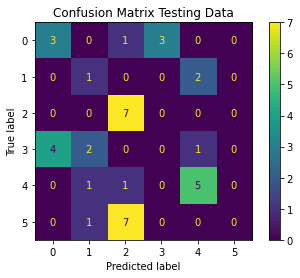

In [59]:
# Confusion matrix for K-NN on testing data
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
cmd.ax_.set_title('Confusion Matrix Testing Data')

# SUMMARY

Using the PCA and KMeans clustering, the results identified four clusters that are the Young Household Bulk Buyer, The mid-aged Wholesaler, The occasional customer, and the mid-ranged wholesaler. Theses clusters were classified based on the Invoice count, total quantity of the products, the total price and the average quantity per product. The clusters classify the wholesalers based on the volume of the quantity of the products as they order the same products in bulk while the personal users were even spending more money but their count of the quantity of the products were very few.


By demographic analysis combining it with employment type, education and marital status the cluster give us the combination for the occasional customers are mostly undergrade, other marital status and private employment. While the combination cluster for mid-ranged Wholesaler were those who have private employment, private employment and are married. 


So, our suggestion to Flora for sending the emails to the mid-aged wholesaler and the mid-ranged wholesalers as wholesalers offers. And these categories are identified by the clusters that have high volume of the average quantity per product along with the demographics. 


